In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
# read in files
df0 = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")
df0.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# check size (row, col)
df0.shape


(21597, 21)

In [4]:
# organize data on bedroom number
df0.groupby('bedrooms')['bedrooms'].agg('count')

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [5]:
# clearing data: ignoring waterfront, view, condition, grade, lat, long, sqft_lot, sqft_living15, sqft_lot15
df1 = df0.drop(['waterfront', 'view', 'condition', 'grade', 'lat', 'long', 'sqft_lot', 'sqft_living15', 'sqft_lot15'], axis='columns')
df1.reset_index(drop=True, inplace=True)

df1.shape

(21597, 12)

In [6]:
size = len(df1['yr_renovated'])
df2 = df1.copy()
df2['yr_renovated'] = df2['yr_renovated'].fillna(0)
for i in range(size):
    if df2['yr_renovated'][i] == 0:
        df2['yr_renovated'][i] = df2['yr_built'][i]


<ipython-input-6-9656c948c1ae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['yr_renovated'][i] = df2['yr_built'][i]


In [7]:
df2['sqft_basement'] = df2['sqft_basement'].replace('?', pd.NA)
df3 = df2.dropna()
df3.reset_index(drop=True, inplace=True)
df3.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [8]:
# check and clean id
def check_int(target):
    try:
        int(target)
    except:
        return pd.NA
    return target


In [9]:
import re

def check_date(target):
    try:
        str(target)
    except:
        return pd.NA
    pattern = r'\b(0?[1-9]|1[0-2])/(0?[1-9]|[1-2][0-9]|3[0-1])/(19|20)\d{2}\b'
    if re.match(pattern, target):
        return target
    else:
        return pd.NA


In [10]:
def check_float(target):
    try:
        float(target)
    except:
        return pd.NA
    return target


In [11]:
# check id
df4 = df3.copy()
df4['id'] = df4['id'].apply(check_int)

In [12]:
# check date
df4['date'] = df4['date'].apply(check_date)

In [13]:
# check price
df4['price'] = df4['price'].apply(check_int)

In [14]:
# check bedrooms
df4['bedrooms'] = df4['bedrooms'].apply(check_int)

In [15]:
# check bathrooms
import math

df4['bathrooms'] = (df4['bathrooms']*1.5).apply(math.ceil)
df4['bathrooms'] = df4['bathrooms'].apply(check_int)

In [16]:
# check sqft_living
df4['sqft_living'] = df4['sqft_living'].apply(check_int)

In [17]:
# check floors
df4['floors'] = df4['floors'].apply(check_int)

In [18]:
# check sqft_above
df4['sqft_above'] = df4['sqft_above'].apply(check_int)

In [19]:
# check sqft_basement
df4['sqft_basement'] = df4['sqft_basement'].apply(check_float)

In [20]:
# check yr_built
df4['yr_built'] = df4['yr_built'].apply(check_int)

In [21]:
# check yr_renovated
df4['yr_renovated'] = df4['yr_renovated'].apply(check_int)

In [22]:
# check validity of yr_renovated and yr_built
mask = df4['yr_renovated'] < df4['yr_built']
df4.loc[mask, 'yr_renovated'] = pd.NA

In [23]:
# check zipcode
df4['zipcode'] = df4['zipcode'].apply(check_int)

In [24]:
df5 = df4.copy()
df5['price/sqft'] = df5['price']/df5['sqft_living']
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price/sqft
0,7129300520,10/13/2014,221900.0,3,2,1180,1.0,1180,0.0,1955,1955.0,98178,188.050847
1,6414100192,12/9/2014,538000.0,3,4,2570,2.0,2170,400.0,1951,1991.0,98125,209.338521
2,5631500400,2/25/2015,180000.0,2,2,770,1.0,770,0.0,1933,1933.0,98028,233.766234
3,2487200875,12/9/2014,604000.0,4,5,1960,1.0,1050,910.0,1965,1965.0,98136,308.163265
4,1954400510,2/18/2015,510000.0,3,3,1680,1.0,1680,0.0,1987,1987.0,98074,303.571429


In [25]:
zip_info = df5.groupby('zipcode')['zipcode'].agg('count').sort_values(ascending=False)
print(len(zip_info))
zip_outliers = zip_info[zip_info < 10]
print(len(zip_outliers))
df5['zipcode'] = df5['zipcode'].apply(lambda a: 'out' if a in zip_outliers else a)
print(len(df5['zipcode'].unique()))

70
0
70


In [26]:
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price/sqft
0,7129300520,10/13/2014,221900.0,3,2,1180,1.0,1180,0.0,1955,1955.0,98178,188.050847
1,6414100192,12/9/2014,538000.0,3,4,2570,2.0,2170,400.0,1951,1991.0,98125,209.338521
2,5631500400,2/25/2015,180000.0,2,2,770,1.0,770,0.0,1933,1933.0,98028,233.766234
3,2487200875,12/9/2014,604000.0,4,5,1960,1.0,1050,910.0,1965,1965.0,98136,308.163265
4,1954400510,2/18/2015,510000.0,3,3,1680,1.0,1680,0.0,1987,1987.0,98074,303.571429


In [27]:
df6 = df5[df5['sqft_living']/df5['bedrooms'] >= 232]

In [28]:
df6['price/sqft'].describe()

count    21133.000000
mean       264.084040
std        110.040874
min         87.588235
25%        182.214765
50%        244.607843
75%        318.012422
max        800.000000
Name: price/sqft, dtype: float64

In [29]:
def rem_price_outliers(data):
    out = pd.DataFrame()
    for k, sub in data.groupby('zipcode'):
        mean = np.mean(sub['price/sqft'])
        std = np.std(sub['price/sqft'])
        inlr = sub[(sub['price/sqft'] > (mean - std)) & (sub['price/sqft'] <= (mean + std))]
        out = pd.concat([out, inlr], ignore_index=True)
    return out

df7 = rem_price_outliers(df6)
print(df6.shape)
print(df7.shape)


(21133, 13)
(16159, 13)


In [30]:
def plot(data,zip):
    bed2 = data[(data['zipcode'] == zip) & (data['bedrooms'] == 2)]
    bed3 = data[(data['zipcode'] == zip) & (data['bedrooms'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2['sqft_living'],bed2['price'],color='blue',label='2 beds', s=50)
    plt.scatter(bed3['sqft_living'],bed3['price'],color='red',label='3 beds', s=50)
    plt.xlabel("sqft_living")
    plt.ylabel("Price (dolar)")
    plt.title(zip)
    plt.legend()

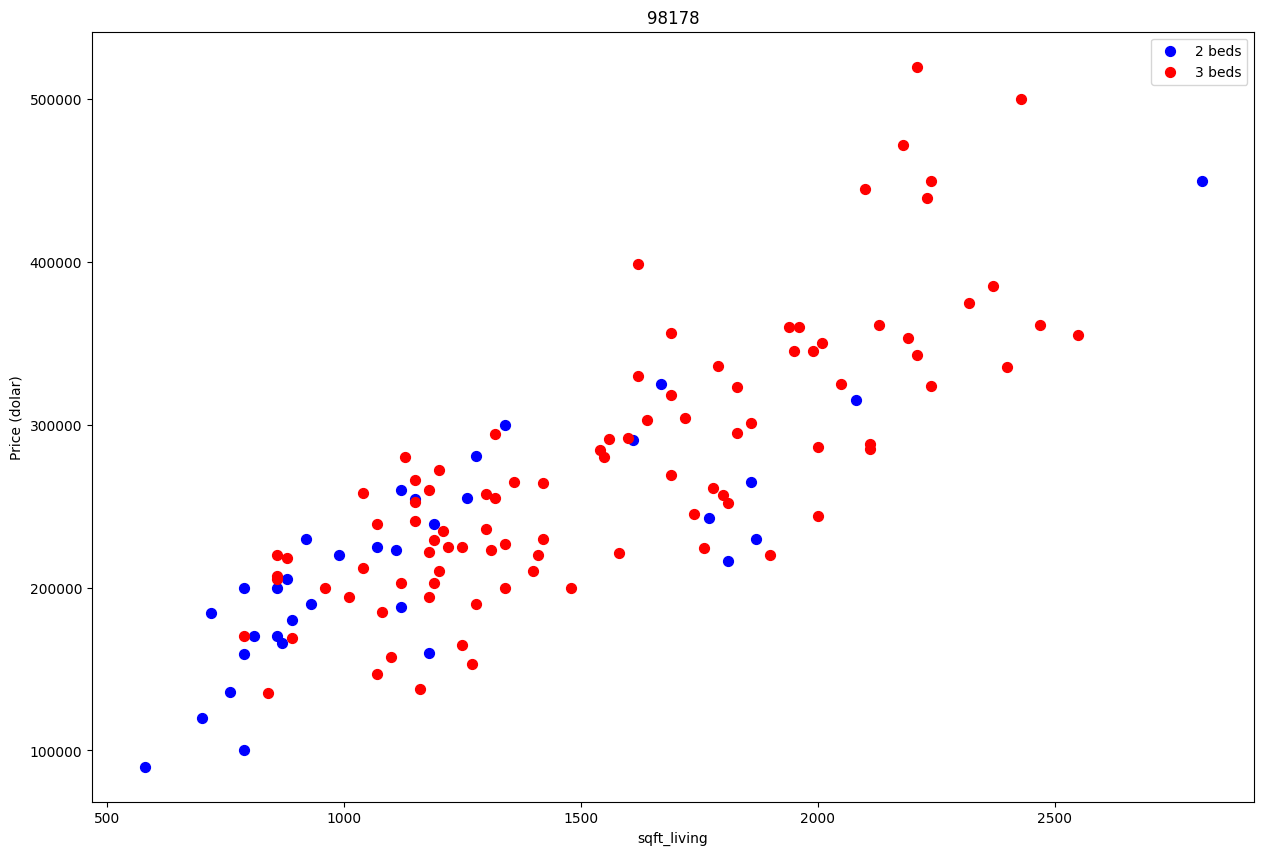

In [31]:
plot(df7, 98178)

In [32]:

def rem_bed_outliers(data):
    out = np.array([])
    for zip, zip_data in data.groupby('zipcode'):
        bed_info = {}
        for bed, bed_data in zip_data.groupby('bedrooms'):
            bed_info[bed] = {
                'mean': np.mean(bed_data['price/sqft']),
                'std': np.std(bed_data['price/sqft']),
                'num': bed_data.shape[0]
            }
        for bed, bed_data in zip_data.groupby('bedrooms'):
            info = bed_info.get(bed - 1)
            if info and info['num'] > 3:
                out = np.append(out, bed_data[bed_data['price/sqft'] < (info['mean'])].index.values)
    return data.drop(out, axis='index')

In [33]:
df8 = rem_bed_outliers(df7)
df8.reset_index(drop=True, inplace=True)

df8.shape

(7166, 13)

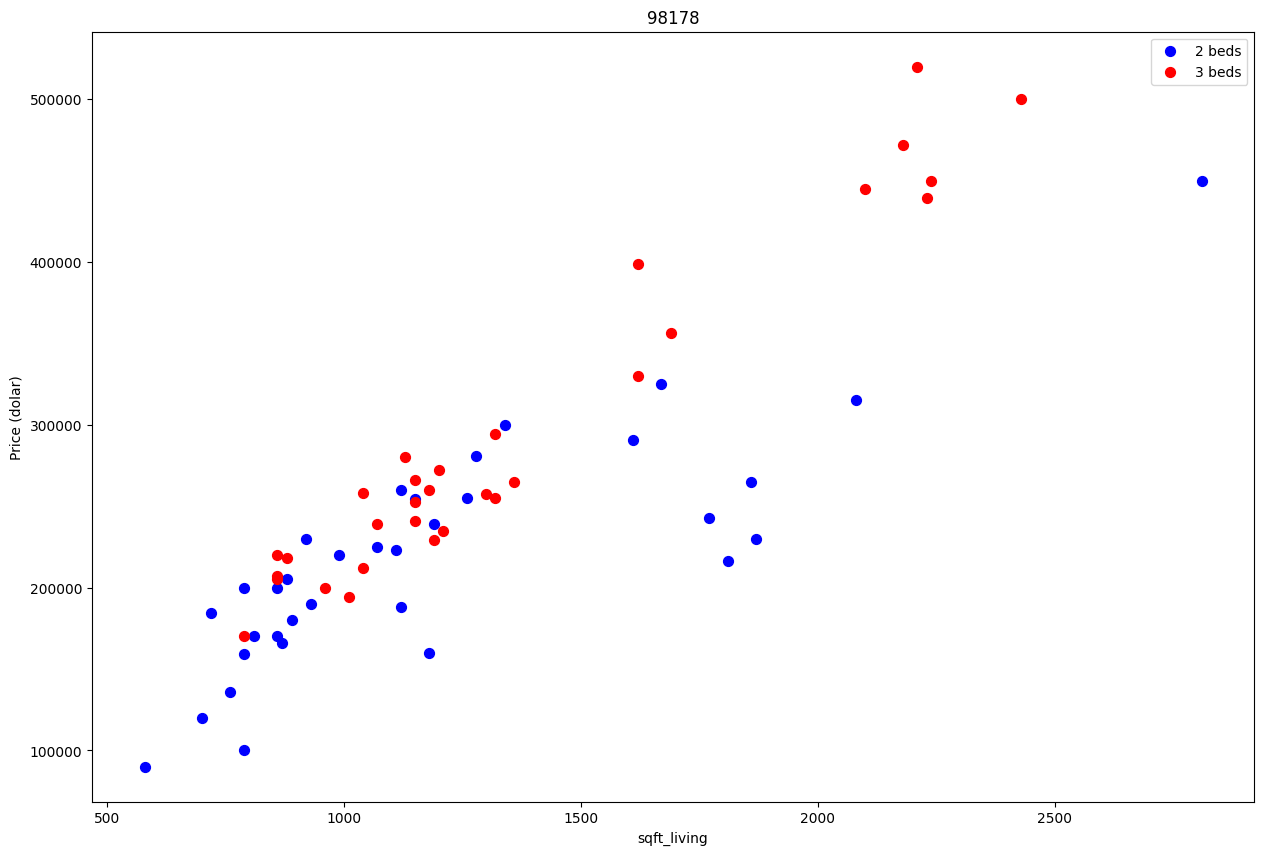

In [34]:
plot(df8, 98178)

Text(0, 0.5, 'num')

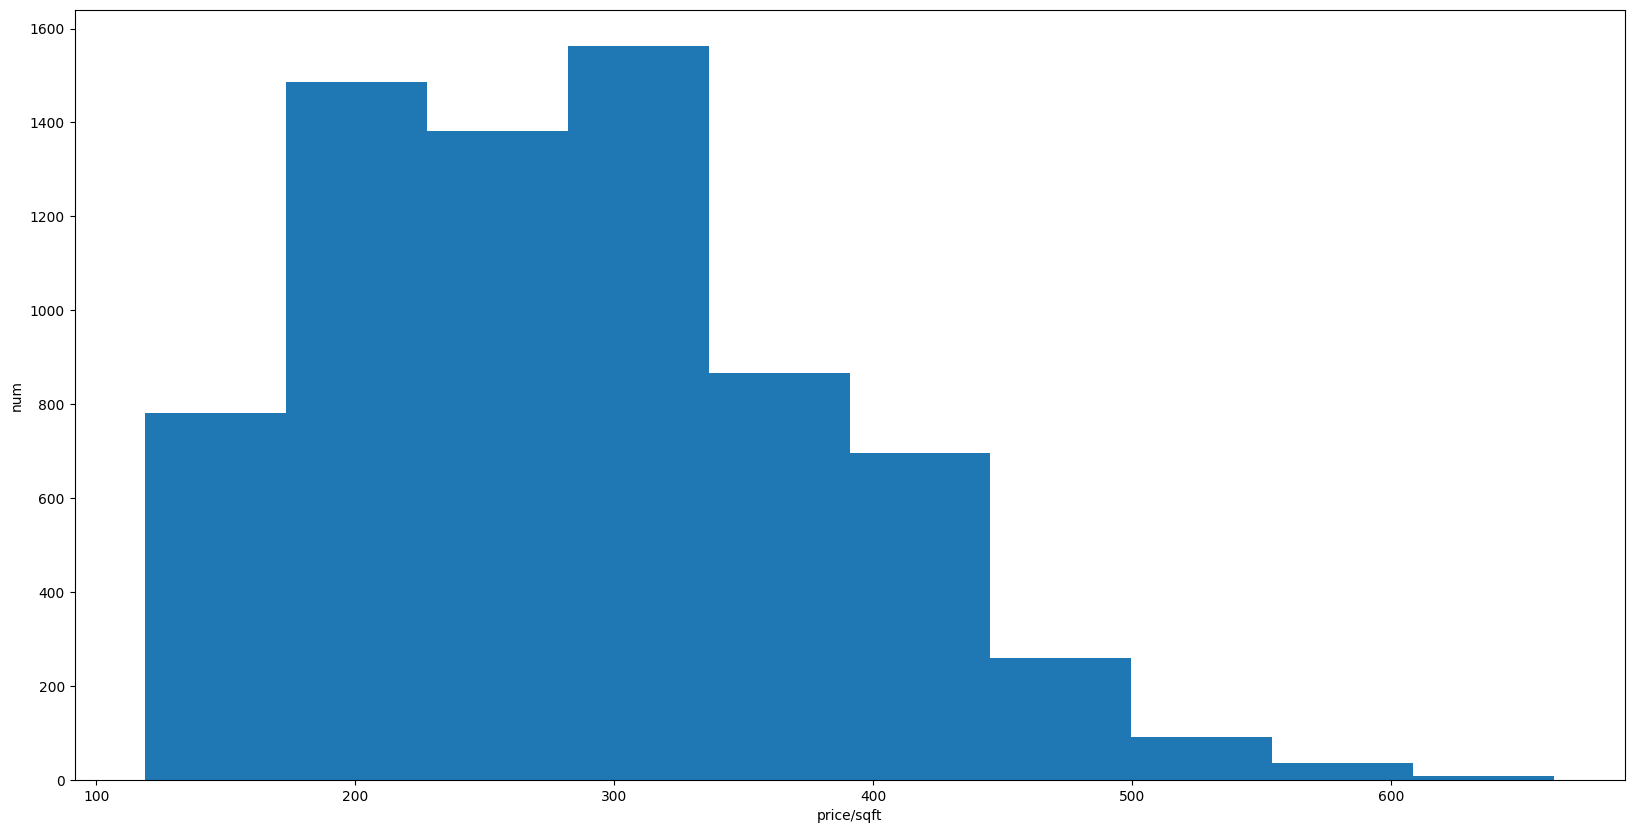

In [35]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df8['price/sqft'], rwidth=1)
plt.xlabel("price/sqft")
plt.ylabel("num")

(array([2.000e+00, 1.564e+03, 2.326e+03, 2.296e+03, 6.210e+02, 2.790e+02,
        5.200e+01, 1.700e+01, 7.000e+00, 2.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

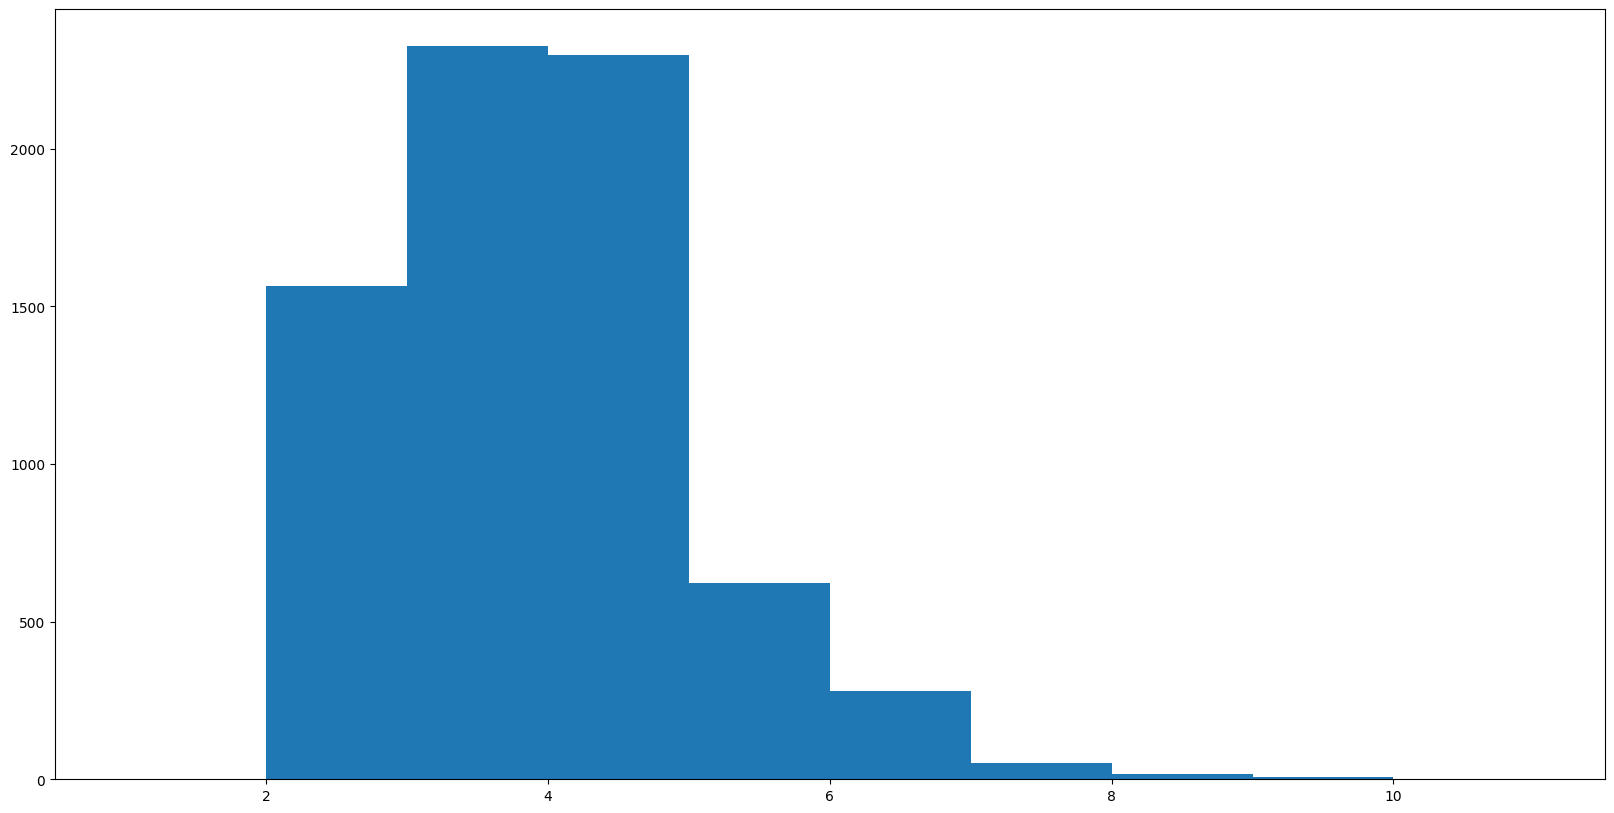

In [36]:
plt.hist(df8['bathrooms'], rwidth=1)

In [37]:
df9 = df8[df8['bathrooms'] < (df8['bedrooms'] + 3)]
df9.reset_index(drop=True, inplace=True)
df10 = df9.drop('price/sqft', axis='columns')

In [38]:
dum = pd.get_dummies(df10['zipcode'])
# dum = dum.drop(98199, axis='columns')
df11 = pd.concat([df10, dum], axis='columns')
df12 = df11.drop('zipcode', axis='columns')

In [39]:
X = df12.drop('price', axis='columns')
X = X.drop('date', axis='columns')
X = X.drop('id', axis='columns')
X.isnull().sum()
X.columns = X.columns.astype(str)

In [40]:
Y = df12['price']
Y.head(10)

0    465000.0
1    360000.0
2    230000.0
3    252000.0
4    243000.0
5    233000.0
6    249900.0
7    196500.0
8    289000.0
9    100000.0
Name: price, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [42]:
# linear regression
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

0.9201969120145899

In [43]:
# cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.92488849, 0.92015248, 0.9242183 , 0.92499398, 0.92464855])

In [44]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def best_model(X,Y):
    models = {
        'li_reg' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'positive': [True, False],
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic'],
                'max_iter': [2000, 3000]
            }
        },
        'dec_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['poisson', 'friedman_mse', 'squared_error', 'absolute_error'],
                'splitter': ['best','random'],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
    for m, config in models.items():
        result =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        result.fit(X, Y)
        scores.append({
            'model': m,
            'best_score': result.best_score_,
            'best_params': result.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [45]:
best_model(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+13, tolerance: 4.130e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+13, tolerance: 4.109e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.386e+13, tolerance: 4.099e

,model,best_score,best_params
0,li_reg,0.923969,"{'copy_X': True, 'fit_intercept': False, 'posi..."
1,lasso,0.923967,"{'alpha': 1, 'max_iter': 2000, 'selection': 'c..."
2,dec_tree,0.821772,"{'criterion': 'poisson', 'splitter': 'random'}"


In [46]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)


0.9201969120145899

In [47]:
X.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,yr_renovated,98001,98002,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,4,2714,2.0,2714,0.0,2005,2005.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,2160,2.0,2160,0.0,1992,1992.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,1450,1.0,1450,0.0,2003,2003.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,1550,1.0,1050,500.0,1969,1969.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,1450,1.0,1450,0.0,1981,1981.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
def price_prediction(zip, bed, bath, sqft, floors, sqft_above, sqft_basement, yr_built, yr_renovated):

    i = np.where(X.columns == zip)[0][0]
    a = np.zeros(len(X.columns))
    a[0] = bed
    a[1] = bath
    a[2] = sqft
    a[3] = floors
    a[4] = sqft_above
    a[5] = sqft_basement
    a[6] = yr_built
    a[7] = yr_renovated
    if i >= 0:
        a[i] = 1
    result = classifier.predict([a])
    if result > 300000:
        result = result - 100000
    return result

In [55]:
price_prediction('98001', 3, 4, 2714, 2, 2714, 0, 2005, 2005)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([463221.28988838])

In [56]:
price_prediction('98199', 5, 8, 3520, 2, 3520, 0, 2001, 2001)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1172514.06426525])

In [62]:
price_prediction('98034', 3, 3, 1260, 1, 1260, 0, 1872, 1972)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([324755.54157829])

In [63]:
import pickle
with open('kc_housing_predict','wb') as f:
    pickle.dump(classifier,f)

In [64]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("cols.json","w") as f:
    f.write(json.dumps(columns))